
=== Total Bill ===
Outliers identified using Z-scores: [39.42 38.01 48.27 40.17 44.3  38.07 41.19 48.17 50.81 45.35 40.55 43.11
 38.73 48.33]
Outliers identified using IQR method: [48.27 44.3  41.19 48.17 50.81 45.35 40.55 43.11 48.33]
Mean: 19.78594262295082
Standard Deviation: 8.884150577771132
Z-scores: [-3.14711305e-01 -1.06323531e+00  1.37779900e-01  4.38315103e-01
  5.40744704e-01  6.19536705e-01 -1.23995452e+00  7.98507107e-01
 -5.34203307e-01 -5.63468908e-01 -1.07111451e+00  1.74175992e+00
 -4.91430507e-01 -1.52624903e-01 -5.57840908e-01  2.01939101e-01
 -1.06436091e+00 -3.93503306e-01 -3.16962505e-01  9.72582994e-02
 -2.10030504e-01  5.67366990e-02 -4.52034507e-01  2.21000952e+00
  3.83349840e-03 -2.22412104e-01 -7.22178510e-01 -7.98719310e-01
  2.15446301e-01 -1.53017018e-02 -1.15215771e+00 -1.61629703e-01
 -5.31952107e-01  1.01760699e-01 -2.25788904e-01  4.81087904e-01
 -3.91252106e-01 -3.21464905e-01 -1.23359303e-01  1.29264551e+00
 -4.21643306e-01 -2.61808105e-01 -6.58019

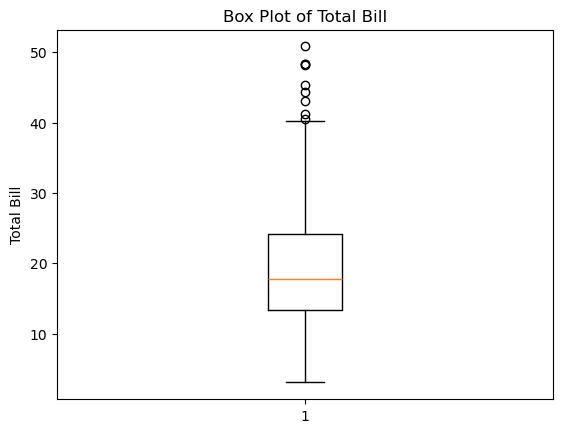

In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
data = pd.read_excel('tips.xlsx') 
def detect_outliers(data_column, column_name): 
    data_values = data[data_column].values 
    mean = np.mean(data_values) 
    stddev = np.std(data_values) 
    z_scores = (data_values - mean) / stddev 
    # Set Z-score threshold for outliers 
    z_threshold = 2 
    # Calculate IQR and bounds for the IQR method 
    q1 = np.percentile(data_values, 25) 
    q3 = np.percentile(data_values, 75) 
    iqr = q3 - q1 
    iqr_lower_bound = q1 - 1.5 * iqr 
    iqr_upper_bound = q3 + 1.5 * iqr 
    # Identify outliers using both methods 
    z_outliers = np.where(np.abs(z_scores) > z_threshold)[0] 
    iqr_outliers = np.where((data_values < iqr_lower_bound) | (data_values > iqr_upper_bound))[0] 
    # Print the outliers 
    print(f"\n=== {column_name} ===") 
    print("Outliers identified using Z-scores:", data_values[z_outliers]) 
    print("Outliers identified using IQR method:", data_values[iqr_outliers]) 
    print("Mean:", mean) 
    print("Standard Deviation:", stddev) 
    print("Z-scores:", z_scores)
    plt.boxplot(data_values) 
    plt.title(f"Box Plot of {column_name}") 
    plt.ylabel(column_name) 
    plt.show() 
detect_outliers('total_bill', 'Total Bill')

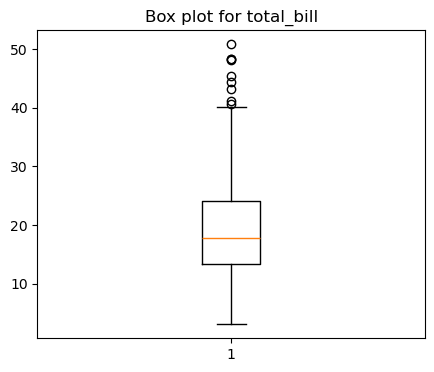

Outlier detected using IQR : [48.27 44.3  41.19 48.17 50.81 45.35 40.55 43.11 48.33]

Z-scores: [-3.14711305e-01 -1.06323531e+00  1.37779900e-01  4.38315103e-01
  5.40744704e-01  6.19536705e-01 -1.23995452e+00  7.98507107e-01
 -5.34203307e-01 -5.63468908e-01 -1.07111451e+00  1.74175992e+00
 -4.91430507e-01 -1.52624903e-01 -5.57840908e-01  2.01939101e-01
 -1.06436091e+00 -3.93503306e-01 -3.16962505e-01  9.72582994e-02
 -2.10030504e-01  5.67366990e-02 -4.52034507e-01  2.21000952e+00
  3.83349840e-03 -2.22412104e-01 -7.22178510e-01 -7.98719310e-01
  2.15446301e-01 -1.53017018e-02 -1.15215771e+00 -1.61629703e-01
 -5.31952107e-01  1.01760699e-01 -2.25788904e-01  4.81087904e-01
 -3.91252106e-01 -3.21464905e-01 -1.23359303e-01  1.29264551e+00
 -4.21643306e-01 -2.61808105e-01 -6.58019309e-01 -1.13752491e+00
  1.19471831e+00 -1.68383303e-01  2.75103101e-01  1.41983831e+00
  9.86482309e-01 -1.96523304e-01 -8.15603311e-01 -1.06886331e+00
  1.69110792e+00 -1.10825931e+00  6.49927905e-01 -3.3311302

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def Outlier_detection(df,col_name):
    np.random.seed(10)
    data =df[col_name]
    plt.figure(figsize =(5,4))
    plt.boxplot(data)
    plt.title(f"Box plot for {col_name}")
    plt.show()

    Q1=np.percentile(data,25)
    Q3=np.percentile(data,75)
    IQR=Q3-Q1
    k=1.5
    lower_bound=Q1-k*IQR
    upper_bound = Q3+k* IQR
    array = data.to_numpy()
    outliers = array[(array<lower_bound)|(array>upper_bound)]
    print(f"Outlier detected using IQR : {outliers}")
    
    mean = np.mean(data)
    std = np.std(data)
    zscores = (data - mean) / std
    outlier_indices = np.where(np.abs(zscores) > k)[0]
    outliers = data[outlier_indices]
    print(f"\nZ-scores: {zscores.values}")
    print(f"\nOutlier Index using Z-scores: {outlier_indices.tolist()}") 
    print(f"\nOutlier detected using-Z score : {outliers.tolist()}")
    
df=pd.read_excel('Tips.xlsx')
Outlier_detection(df,'total_bill')